# <center> Проект: Анализ вакансий на hh.ru
   

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [159]:
df = pd.read_csv('data\dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [160]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

**Вывод:** пропуски имеются в трёх столбцах:
'Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность'. Размерность таблицы: (44744, 12). Все столбцы таблицы имеют тип "object".

5. Выведите основную статистическую информацию о столбцах.


In [162]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


**Вывод:** из стастической таблицы можно увидеть основные показатели. Например, в столбце «Опыт работы» содержится 44413 уникальных значений. Самая распространенная должность: cистемный администратор.


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [163]:
def get_level_education(education):
    if education[0] == 'Н':
        return 'неоконченное высшее'
    if education[0] == 'В':
        return 'высшее'
    lst = education.split()
    if lst[0] == 'Среднее' and lst[1] == 'специальное':
        return 'среднее специальное'
    if lst[0] == 'Среднее':
        return 'среднее'    
    return '0'


df['Образование'] = df['Образование и ВУЗ'].apply(get_level_education)
print(df['Образование'].value_counts())

df.drop('Образование и ВУЗ', axis=1, inplace=True)

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64


**Вывод:** 559 соискателей имеет средний уровень образования (школьное образование).

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [164]:
df['Пол'] = df['Пол, возраст'].apply(lambda x: x[0])
df['Возраст'] = df['Пол, возраст'].apply(lambda x: x.split(sep=' , ')[1].split()[0])

df['Возраст'] = df['Возраст'].astype('int8')
df['Пол'] = df['Пол'].astype('string')

print((df['Пол'].value_counts(normalize=True)[1] * 100).round(2), "% женских резюме представлено в данных")
print(df['Возраст'].mean().round(1), "- средний возраст соискателей")

df.drop('Пол, возраст', axis=1, inplace=True)


19.07 % женских резюме представлено в данных
32.2 - средний возраст соискателей


**Вывод:** 
19.07 % женских резюме представлено в данных.
32.2 - средний возраст соискателей.

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [165]:
df['Опыт работы'].fillna('0', inplace=True)

def get_experience(experience_str):
    if experience_str == '0':
        return np.nan
    if experience_str == 'Не указано':
        return np.nan
    
    years = ['год', 'года', 'лет']
    months = ['месяц', 'месяцев', 'месяца']
    exp_list = experience_str.split(' ')
    exp_list = exp_list[2:6:]
    
    total = 0
    if exp_list[1] in years:
        total += 12 * int(exp_list[0])
    if exp_list[1] in months:
        total += int(exp_list[0])
    if exp_list[3] in months:
        total += int(exp_list[2])
    return total


df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience)
print(df['Опыт работы (месяц)'].median(), " - медианный опыт работы (в месяцах) в таблице")
df.drop('Опыт работы', axis=1, inplace=True)

100.0  - медианный опыт работы (в месяцах) в таблице


**Вывод:** 100.0  - медианный опыт работы (в месяцах) в таблице.

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [166]:
def get_relocation_and_trip(info_str):
    info_lst = info_str.split(sep=' , ')
    # удаляем информацию о метро
    if info_lst[1].split()[0] == 'м.':
        info_lst.pop(1)
        
    ready_relocate = False
    ready_trip = False
    # готовность к переезду
    if info_lst[1][0] == 'г' or info_lst[1][0] == 'х':
        ready_relocate = True
    # готовность к командировкам
    if len(info_lst) >= 3:
        if info_lst[2][0] == 'г' or info_lst[2][0] == 'х':
            ready_trip = True
    # return ready_relocate
    return ready_relocate, ready_trip

def get_city(city_str):
    city = city_str.split(sep=' , ')[0]
    if city in top_cities:
        return city
    if city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'


ready = df['Город, переезд, командировки'].apply(get_relocation_and_trip)
df['Готовность к переезду'] = ready.apply(lambda x: x[0])
df['Готовность к командировкам'] = ready.apply(lambda x: x[1])

top_cities = ['Москва', 'Санкт-Петербург']
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск',
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
df['Город'] = df['Город, переезд, командировки'].apply(get_city)

print(round(df['Город'].value_counts()['Санкт-Петербург'] / df.shape[0] * 100), 
      "% соискателей живут в Санкт-Петербурге")

mask1 = df['Готовность к переезду'] == True
mask2 = df['Готовность к командировкам'] == True
print(round(df[mask1 & mask2].shape[0] / df.shape[0] * 100), 
      "% соискателей готовы одновременно и к переездам, и к командировкам")

df.drop('Город, переезд, командировки', inplace=True, axis=1)


11 % соискателей живут в Санкт-Петербурге
32 % соискателей готовы одновременно и к переездам, и к командировкам


**Вывод:** 11 % соискателей живут в Санкт-Петербурге.
32 % соискателей готовы одновременно и к переездам, и к командировкам.

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [167]:
df['Занятость'] = df['Занятость'].apply(lambda x: x.split(sep=', '))
df['График'] = df['График'].apply(lambda x: x.split(sep=', '))

employment = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for col in employment:
    df[col] = df['Занятость'].apply(lambda x: col in x)
for col in schedule:
    df[col] = df['График'].apply(lambda x: col in x)
    
mask1 = df['проектная работа'] == True
mask2 = df['волонтерство'] == True
print(df[mask1 & mask2].shape[0], "людей ищут проектную работу и волонтёрство")

mask1 = df['вахтовый метод'] == True
mask2 = df['гибкий график'] == True
print(df[mask1 & mask2].shape[0], "людей хотят работать вахтовым методом и с гибким графиком")

df.drop(['Занятость', 'График'], axis=1, inplace=True)

436 людей ищут проектную работу и волонтёрство
2311 людей хотят работать вахтовым методом и с гибким графиком


**Вывод:** 436 людей ищут проектную работу и волонтёрство.
2311 людей хотят работать вахтовым методом и с гибким графиком.

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [168]:
exchange_df = pd.read_csv('data/ExchangeRates.csv')
exchange_df.drop(['per', 'time', 'vol'], axis=1, inplace=True)
exchange_df['date'] = pd.to_datetime(exchange_df['date'], dayfirst=True)

df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True)
df['Обновление резюме'] = df['Обновление резюме'].dt.date

currency_dict = {
    'руб.': 'RUB', 
    'KZT': 'KZT',
    'USD': 'USD',
    'бел.руб.': 'BYN',
    'EUR': 'EUR',
    'грн.': 'UAH',
    'сум': 'UZS',
    'KGS': 'KGS',
    'AZN': 'AZN' 
}
df['ISO'] = df['ЗП'].apply(lambda x: currency_dict[x.split(' ')[1]])
df['ISO'].value_counts()

df[['ISO', 'Обновление резюме']] = df[['ISO', 'Обновление резюме']].astype('string')
exchange_df[['currency', 'date']] = exchange_df[['currency', 'date']].astype('string')

df = df.merge(
    exchange_df,
    how='left',
    left_on=['ISO', 'Обновление резюме'],
    right_on=['currency', 'date'],
)
df['close'] = df['close'].fillna(1)
df['proportion'] = df['proportion'].fillna(1)

df['ЗП'] = df['ЗП'].apply(lambda x: float(x.split(' ')[0]))
df['ЗП (руб)'] = df['ЗП'] * df['close'] / df['proportion']

print(df['ЗП (руб)'].median(), " - желаемая медианная заработная плата соискателей.")

df.drop(['ЗП', 'ISO', 'currency', 'date', 'close', 'proportion'], axis=1, inplace=True)

59019.0  - желаемая медианная заработная плата соискателей.


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

30 лет - модальное значение возраста соискателей.
1 - количество людей возраста 100 лет


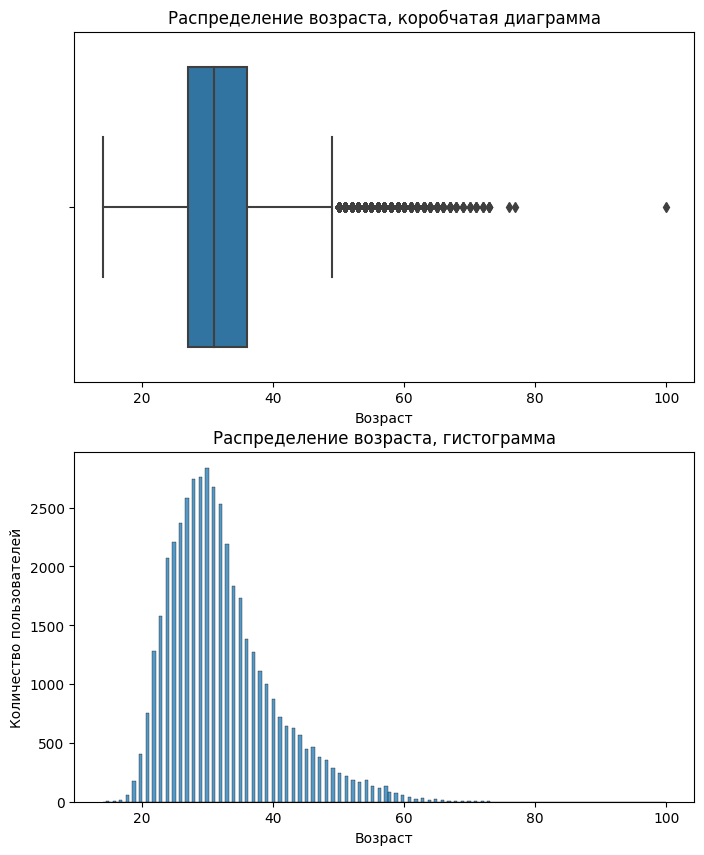

In [169]:
plt.style.use('default')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

boxplot = sns.boxplot(
    data=df,
    x='Возраст',
    ax = axes[0]
)
boxplot.set_title('Распределение возраста, коробчатая диаграмма');
boxplot.set_xlabel('Возраст', fontsize=10);
boxplot.set_ylabel('');

histplot = sns.histplot(
    data=df,
    x='Возраст',
    ax=axes[1]
);
histplot.set_title('Распределение возраста, гистограмма');
histplot.set_ylabel('Количество пользователей');
histplot.set_xlabel('Возраст');

print(df['Возраст'].mode()[0], 'лет - модальное значение возраста соискателей.')
print(df[df['Возраст'] == 100].shape[0], "- количество людей возраста 100 лет")

**Вывод:** модальное значение возраста равно 30 годам. Распределение схоже с логнормальным распределением. Большинство соискателей имеют возраст от 18 до 50 лет. Согласно коробчатой диаграмме, аномалиями необходимо считать соискателей возраста более 50 лет. Однако, распределние выглядит как логнормальное, и аномалией мы будем считать лишь одного соискателя, который указал возраст равный 100 годам.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

1188.0 месяцев - аномалия
81.0 модальное значение опыта работы


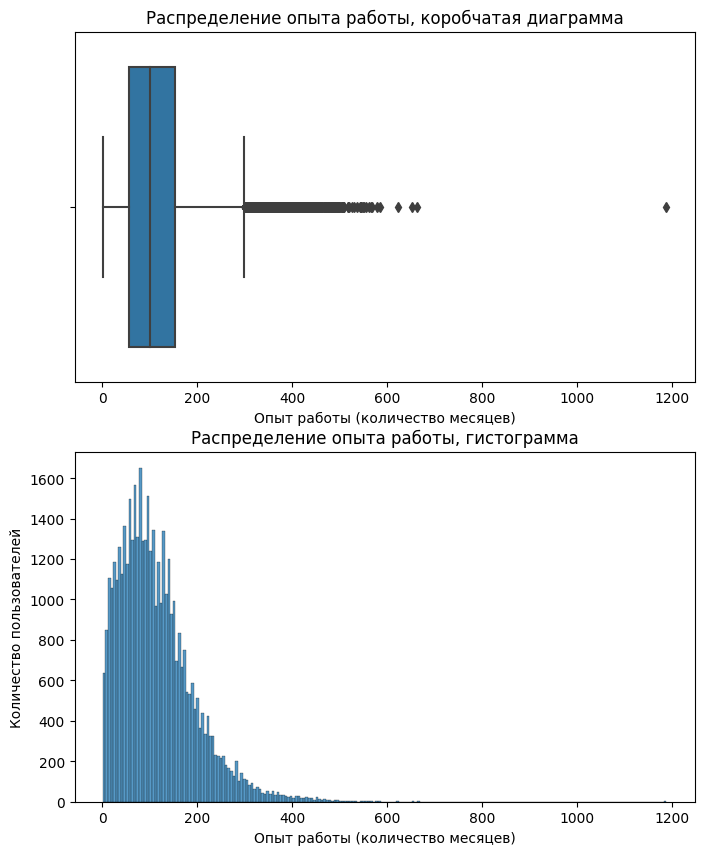

In [170]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

boxplot = sns.boxplot(
    data=df,
    x='Опыт работы (месяц)',
    ax = axes[0]
)
boxplot.set_title('Распределение опыта работы, коробчатая диаграмма');
boxplot.set_xlabel('Опыт работы (количество месяцев)', fontsize=10);
boxplot.set_ylabel('');

histplot = sns.histplot(
    data=df,
    x='Опыт работы (месяц)',
    ax=axes[1]
);
histplot.set_title('Распределение опыта работы, гистограмма');
histplot.set_ylabel('Количество пользователей');
histplot.set_xlabel('Опыт работы (количество месяцев)');

print(df['Опыт работы (месяц)'].max(), "месяцев - аномалия")
print(df['Опыт работы (месяц)'].mode()[0], "модальное значение опыта работы")

**Вывод:** модальное значение опыта работы равно 81 месяцу. Распределение схоже с логнормальным распределением. Большинство соискателей имеют опыт работы от 0 до 360 месяцев (30 лет). Согласно коробчатой диаграмме аномалиями необходимо считать соискателей с опытом работы более 300 месяцев (25 лет). Однако с точки зрения здравого смысла это неверно, и необходимо сверять опыт работы с возрастом соискателей. Очевидной аномалией является единственный соискатель с опытом работы 1188 месяцев (99 лет). Свойством распределения являются "пики", которые можно объяснить округлением опыта работы соискателей.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


32 человека просят з/п более 500_000 руб
5 человек просят з/п более 1_000_000 руб
Мода: 50000.0


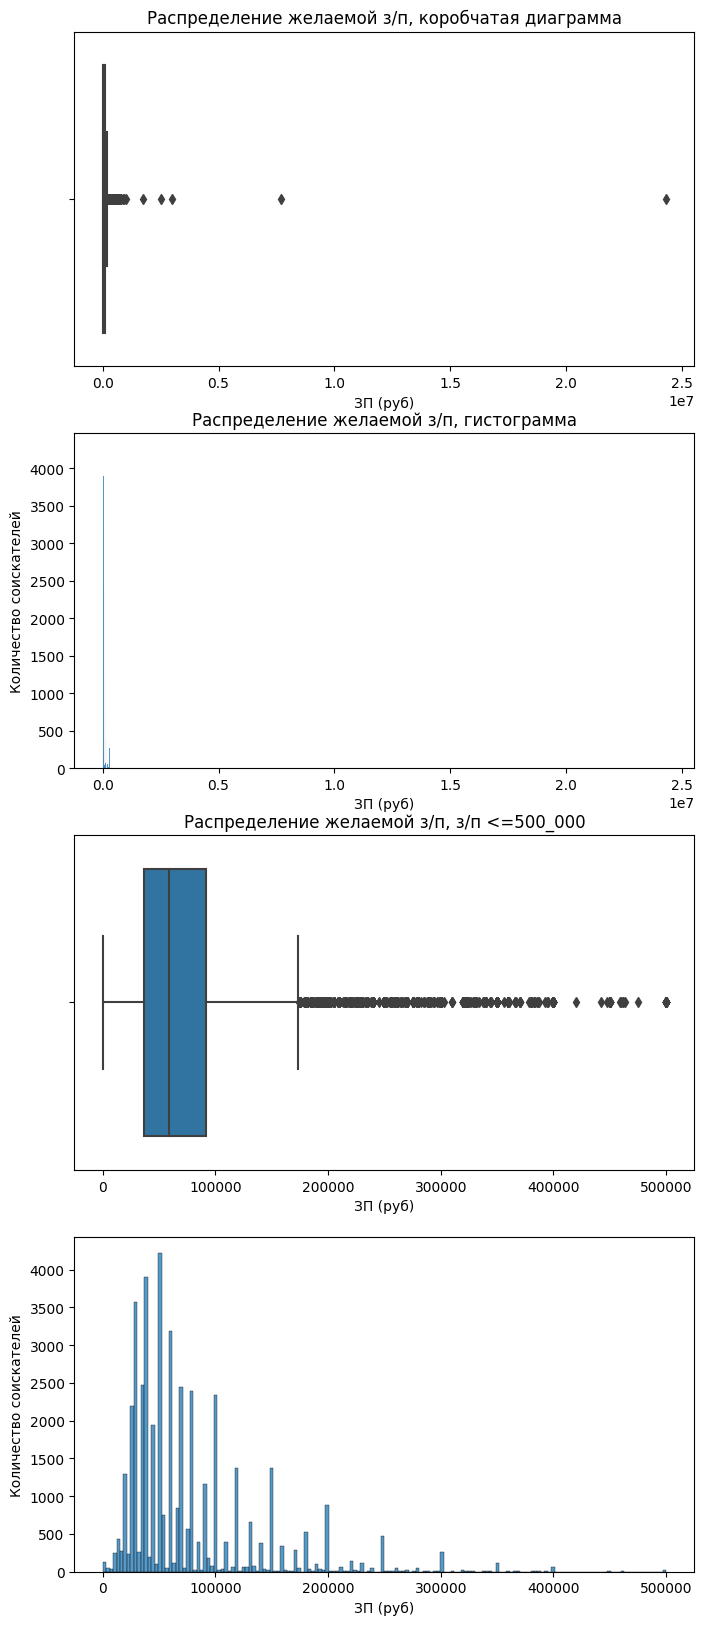

In [171]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20))

boxplot = sns.boxplot(
    data=df,
    x='ЗП (руб)',
    ax = axes[0]
)
boxplot.set_title('Распределение желаемой з/п, коробчатая диаграмма');
boxplot.set_xlabel('ЗП (руб)', fontsize=10);
boxplot.set_ylabel('');

histplot = sns.histplot(
    data=df,
    x='ЗП (руб)',
    ax=axes[1]
);
histplot.set_title('Распределение желаемой з/п, гистограмма');
histplot.set_ylabel('Количество соискателей');
histplot.set_xlabel('ЗП (руб)');

boxplot_part = sns.boxplot(
    data=df[df['ЗП (руб)'] <= 500_000],
    x='ЗП (руб)',
    ax = axes[2]
)
boxplot_part.set_title('Распределение желаемой з/п, з/п <=500_000');
boxplot_part.set_xlabel('ЗП (руб)', fontsize=10);
boxplot_part.set_ylabel('');

histplot_part = sns.histplot(
    data=df[df['ЗП (руб)'] <= 500_000],
    x='ЗП (руб)',
    ax=axes[3]
);
histplot_part.set_ylabel('Количество соискателей');
histplot_part.set_xlabel('ЗП (руб)');

print(df[df['ЗП (руб)'] > 500_000].shape[0], 'человека просят з/п более 500_000 руб') 
print(df[df['ЗП (руб)'] > 1_000_000].shape[0], 'человек просят з/п более 1_000_000 руб')

print('Мода:', df['ЗП (руб)'].mode()[0])

**Вывод:** Распределение признака желаемой з/п "прижато" к нулю, что указывает на аномалии (5 человек, которые указали зарплату более миллиона рублей). Если выбросить 32 человека, которые запросили зарплату боле полумиллиона рублей, то распределение признака отдаленно напоминает логнормальное, но у него много пиков (потому что люди округляют свою желаемую зарплату). Большинство соискателей запрашивают до 200 тыс. руб. Модой распределения является 50 тыс. руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

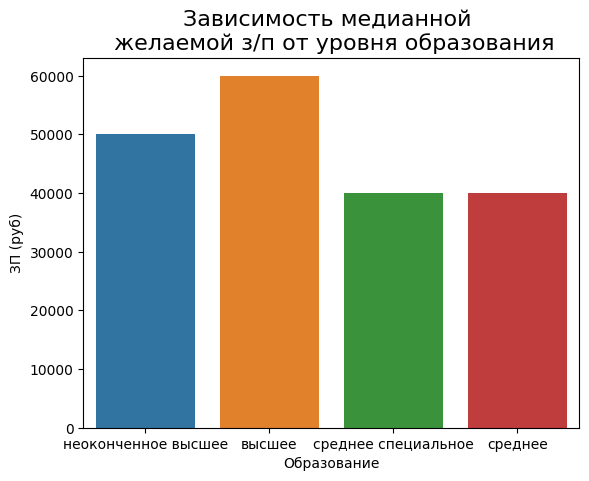

In [172]:
ax = sns.barplot(
    data=df[df['ЗП (руб)'] < 1_000_000],
    x='Образование',
    y='ЗП (руб)',
    estimator=np.median,
    ci=None,
    orient='v'
)
ax.set_title('Зависимость медианной \n желаемой з/п от уровня образования', fontsize=16);

**Вывод:** Зависимость медианной желаемой з/п от уровня образования отражена на столбчатой диаграмме. Самый высокий уровень запрашиваемой з/п у категории с высшим образованием. Самый низкий уровень - у соискателей со средним и средним специальным образованием. Наличие высшего образования повышает шансы соискателя на более высокооплачиваемую работу.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

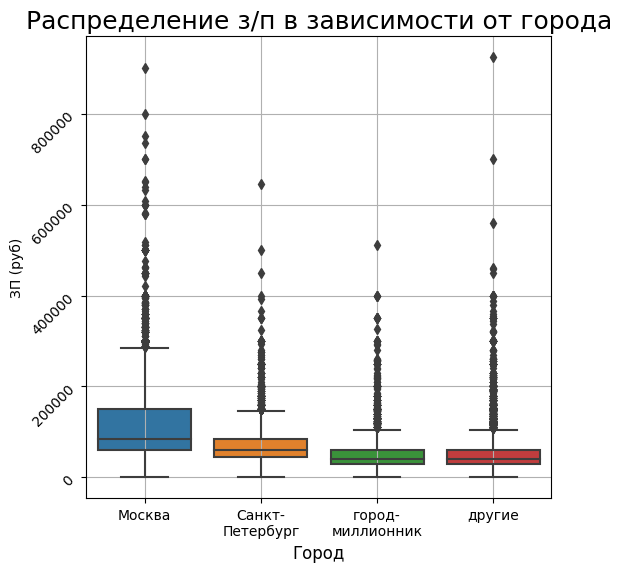

In [173]:
fig = plt.figure(figsize=(6, 6))

boxplot = sns.boxplot(
    data=df[df['ЗП (руб)'] < 1_000_000],
    y='ЗП (руб)',
    x='Город',
    order=['Москва','Санкт-Петербург','город-миллионник', 'другие'],
    orient='v',
);
boxplot.yaxis.set_tick_params(rotation=45)
boxplot.set_xticks([0, 1, 2, 3], labels=['Москва', 'Санкт-\nПетербург', 'город-\nмиллионник', 'другие']);
boxplot.grid()
boxplot.set_xlabel('Город', fontsize=12);
boxplot.set_title('Распределение з/п в зависимости от города', fontsize=18);

**Вывод:** медианные заработные платы выше в Москве, далее следует Санект-Петербург, в остальных городах они плюс минус равны. Разница между 25-й и 75-й квантилью также тем больше, чем крупнее город. Признак города важен для прогнозирования з/п. В категории "другие" зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

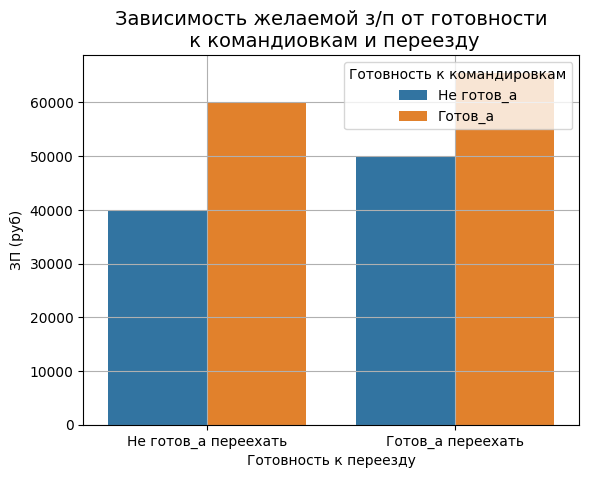

In [174]:
ax = sns.barplot(
    data=df[df['ЗП (руб)'] < 1_000_000],
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    estimator=np.median,
    ci=None,
    orient='v',
    # palette='Set2'
);
ax.set_xticks([0, 1], labels=['Не готов_а переехать', 'Готов_а переехать']);
ax.set_title('Зависимость желаемой з/п от готовности\n к командиовкам и переезду', fontsize=14);
ax.legend(['Не готов_а', 'Готов_а'], title='Готовность к командировкам')
ax.grid();

**Вывод:** если соискатель готов к переезду, ожидаемая з/п выше. Аналогичное верно для признака готовности к командировкам

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

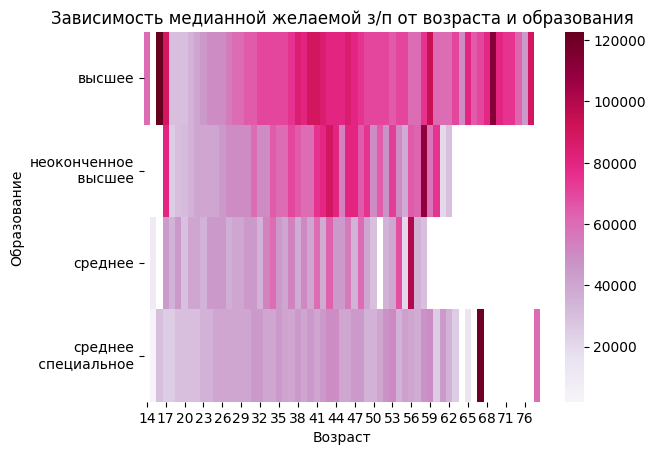

In [175]:
pivot_table = df.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median'
)

ax = sns.heatmap(
    data=pivot_table,
    cmap ='PuRd'
)
ax.set_yticks([0.5, 1.5, 2.5, 3.5], labels=['высшее', 'неоконченное\n высшее', 'среднее', 'среднее\n специальное']);
ax.set_title('Зависимость медианной желаемой з/п от возраста и образования');

**Вывод:** ожидается, что цвета в тепловой карте будут меняться плавно. Там, где это не происходит, можно считать выбросами. З/п для соискателей со средним специальным или средним образованием не сильно коррелирует с возрастом. Наибольший карьерный рост наблюдается у соискателем с высшим образованием. В 38 лет они получают свою максимальную з/п. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

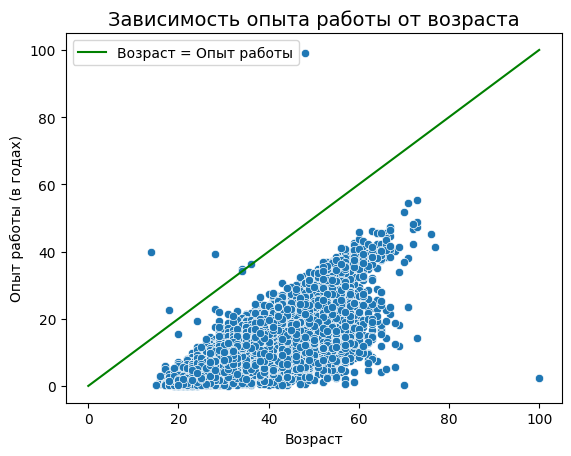

In [176]:
df['Опыт работы (год)'] = df['Опыт работы (месяц)'] / 12

ax = sns.scatterplot(
    data=df,
    y='Опыт работы (год)',
    x='Возраст',
)
x = np.linspace(0, 100, 1000)
ax.plot(x, x, color='green', label='Возраст = Опыт работы');
ax.set_ylabel('Опыт работы (в годах)');
ax.set_title('Зависимость опыта работы от возраста', fontsize=14);
ax.legend();

df = df.drop('Опыт работы (год)', axis=1)

**Вывод:** здравый смысл подсказывает, что возраст соискателя должен быть больше опыта работы в годах, что мы и видим на графике, а также мы находим 7 строк и сыбросами (опыт > возраста). В остальном, зависимости между опытом и возрастом не выявлено.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [177]:
mask = df.duplicated()
duplicates = df[mask]
print(f'Число найденных дубликатов: {duplicates.shape[0]}')
df.drop_duplicates(inplace=True)
print(f'Результирующее число записей: {df.shape[0]}')

Число найденных дубликатов: 161
Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [178]:
df.info()
print('В столбце "Опыт работы (месяц)" найдено 168 пропусков')
print ("Также пропуски имеются в столбцах Последнее/нынешнее место работы (1), Последняя/нынешняя должность (2)")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44583 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44583 non-null  object 
 1   Последнее/нынешнее место работы  44582 non-null  object 
 2   Последняя/нынешняя должность     44581 non-null  object 
 3   Обновление резюме                44583 non-null  string 
 4   Авто                             44583 non-null  object 
 5   Образование                      44583 non-null  object 
 6   Пол                              44583 non-null  string 
 7   Возраст                          44583 non-null  int8   
 8   Опыт работы (месяц)              44415 non-null  float64
 9   Готовность к переезду            44583 non-null  bool   
 10  Готовность к командировкам       44583 non-null  bool   
 11  Город                            44583 non-null  object 
 12  полная занятость  

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [179]:
df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], inplace=True)
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(df['Опыт работы (месяц)'].median())

print(df['Опыт работы (месяц)'].mean().round(), ' - средний опыт работы в месяцах')

114.0  - средний опыт работы в месяцах


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [180]:
mask1 = df['ЗП (руб)'] > 1_000_000
mask2 = df['ЗП (руб)'] < 1_000

lines_to_drop = df[mask1|mask2]

df.drop(index=lines_to_drop.index, inplace=True)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [181]:
mask = df['Возраст'] < (df['Опыт работы (месяц)']/12)
df.drop(index=df[mask].index, inplace=True)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482
0.4523422276053838


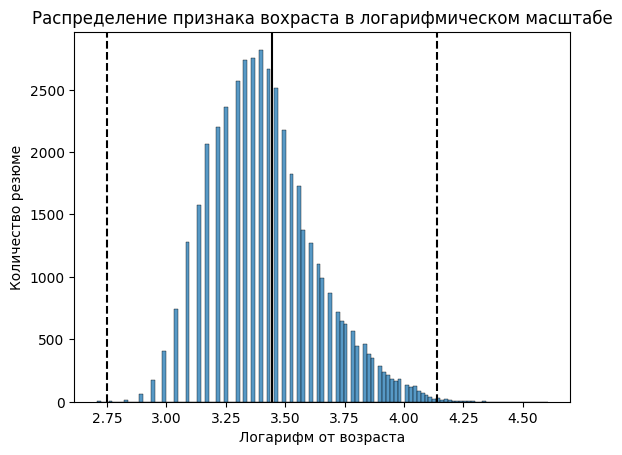

In [182]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    """Функция исключения выбросов из данных правилом z-отклонения (правилом трех сигм). 
    Подходит для нормального и логнормального распределения.

    Args:
        data (pd.DataFrame): датасет
        feature (str): название признака, по которому ведется очистка
        log_scale (bool, optional): Необходимо ли логарифмировать данные столбца. 
        If True, логарифмируем данные. Defaults to False.
        left (float): количество "сигм", на которое мы отступаем влево
        right (float): количество "сигм", на которое мы отступаем вправо

    Returns:
        outliers (pd.DataFrame): таблица с данными, из которыо вычеркнуты строки, подлежавшие очистке
        cleaned (pd.DataFrame): вычеркнутые строки из изначального датасета
    """
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


df['Возраст'] = df['Возраст'].astype(int)

log_age = np.log(df['Возраст'])
# log_age = log_age.astype(float)

ax = sns.histplot(log_age)
ax.set_xlabel('Логарифм от возраста', fontsize=10);
ax.set_ylabel('Количество резюме');
ax.set_title('Распределение признака вохраста в логарифмическом масштабе');

ax.axvline(log_age.mean(), lw=1.5, color='k');
ax.axvline(log_age.mean() - 3 * log_age.std(), ls='--', lw=1.5, color='k');
ax.axvline(log_age.mean() + 3 * log_age.std(), ls='--', lw=1.5, color='k');

outliers, cleaned = outliers_z_score_mod(df, 'Возраст', log_scale=True, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
print(log_age.skew())

df.drop(index=outliers.index, inplace=True)

**Вывод:** в выбросы попали соискатели возраста 15 и 100 лет. Всего найдено 3 выброса. Лог. распределение ассиметрично в правую сторону.